<a href="https://colab.research.google.com/github/AaradhyVijaywat/ML-Based-Mini-Projects-/blob/main/KMeans_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the uploaded dataset
file_path = "/content/Mall_Customers.csv"
df = pd.read_csv(file_path)

# Show the first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
# Step 1: Data Preprocessing
# We'll use only 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


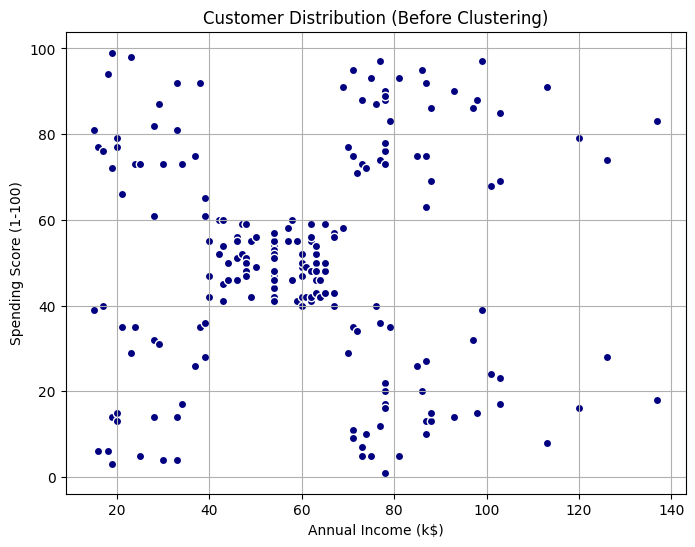

In [ ]:
# Step 2: Visualize Raw Data
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c='navy', edgecolor='w')
plt.title("Customer Distribution (Before Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()

In [ ]:
# Step 3: Elbow Method to Find Optimal Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

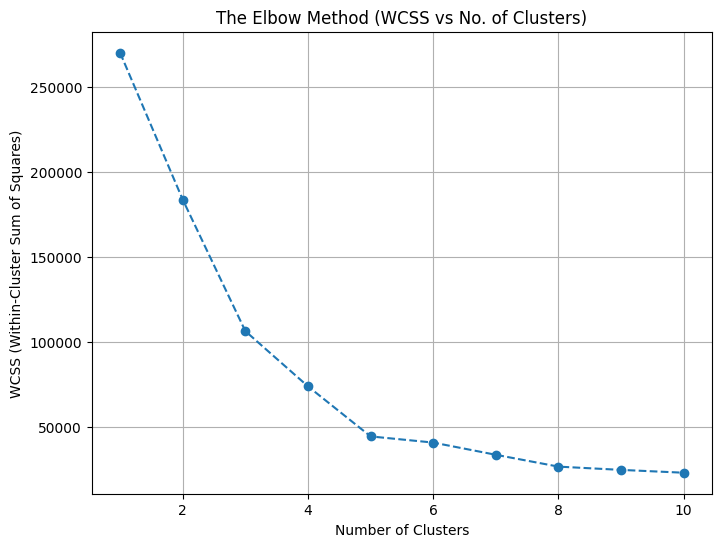

In [ ]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("The Elbow Method (WCSS vs No. of Clusters)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

In [ ]:
# Step 4: Apply K-Means with 5 Clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


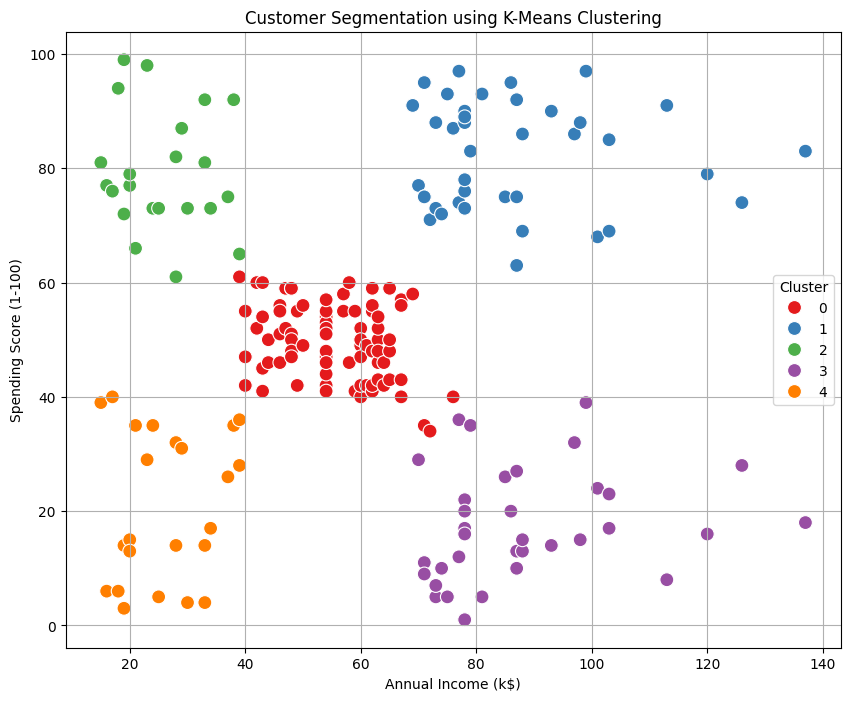

In [ ]:
# Step 5: Visualize the Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title("Customer Segmentation using K-Means Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
# Show cluster centers
centers = kmeans.cluster_centers_
centers_df = pd.DataFrame(centers, columns=["Annual Income (k$)", "Spending Score (1-100)"])
centers_df

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


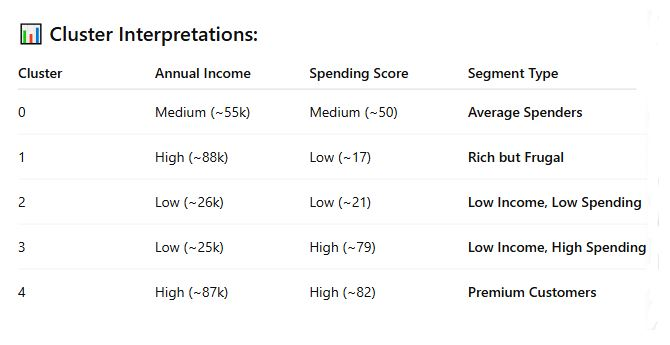

# **Marketing Strategy Ideas:**

* Cluster 4 (Premium Customers): Offer
luxury, exclusive products, early access sales.

* Cluster 3 (Young High Spenders): Push loyalty programs, trendy and value deals.

* Cluster 1 (Rich but Frugal): Highlight investment value, premium savings, bundles.

* Cluster 0 (Balanced): General campaigns, mid-tier promotions.

* Cluster 2 (Low spenders): Focus on budget-friendly offers, referral programs.